In [96]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

In [97]:
from google.colab import files
uploaded = files.upload()

Saving train_distance_matrix.csv to train_distance_matrix (1).csv


In [100]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['train_distance_matrix (1).csv']))

In [101]:
import pandas as pd
datatdm = pd.read_csv('train_distance_matrix.csv')
datatdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39396 entries, 0 to 39395
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  39396 non-null  object 
 1   vendor_id           39396 non-null  int64  
 2   pickup_datetime     39396 non-null  object 
 3   dropoff_datetime    39396 non-null  object 
 4   passenger_count     39396 non-null  int64  
 5   pickup_longitude    39396 non-null  float64
 6   pickup_latitude     39396 non-null  float64
 7   dropoff_longitude   39396 non-null  float64
 8   dropoff_latitude    39396 non-null  float64
 9   store_and_fwd_flag  39396 non-null  object 
 10  gc_distance         39396 non-null  float64
 11  trip_duration       39396 non-null  int64  
 12  google_distance     38837 non-null  float64
 13  google_duration     38837 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 4.2+ MB


In [102]:
datatdm = datatdm.sample(frac=1)
datatdm

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,gc_distance,trip_duration,google_distance,google_duration
23372,id2680241,1,1/6/2016 0:15,1/6/2016 0:20,2,-73.964,40.710,-73.952,40.714,N,0.674,275,1483.000,418.000
18648,id1348836,2,1/4/2016 21:02,1/4/2016 21:11,2,-73.977,40.764,-73.958,40.761,N,1.025,558,2074.000,680.000
26380,id3971248,2,1/6/2016 16:27,1/6/2016 16:40,3,-73.981,40.774,-73.959,40.769,N,1.188,770,2653.000,580.000
34438,id1498809,1,1/8/2016 1:37,1/8/2016 1:56,1,-73.983,40.772,-73.937,40.856,N,6.307,1167,14578.000,1150.000
19943,id3728538,1,1/5/2016 7:55,1/5/2016 8:04,1,-74.008,40.723,-73.996,40.739,N,1.280,563,2326.000,548.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38446,id1058773,1,1/8/2016 19:09,1/8/2016 19:13,1,-73.994,40.746,-73.998,40.738,N,0.599,221,1137.000,256.000
32627,id2538429,2,1/7/2016 19:16,1/7/2016 19:21,2,-73.981,40.768,-73.977,40.776,N,0.598,294,1026.000,256.000
23762,id0016916,2,1/6/2016 6:46,1/6/2016 6:55,5,-73.990,40.758,-73.970,40.758,N,1.027,578,2324.000,781.000
11639,id3810137,1,1/3/2016 11:45,1/3/2016 11:59,1,-73.947,40.772,-73.975,40.762,N,1.652,864,3871.000,758.000


In [103]:
ratio = 0.75

total_rows = datatdm.shape[0]
train_size = int(total_rows*ratio)

train = datatdm[0:train_size]
test = datatdm[train_size:]

In [104]:
print("Train dataframe")
print(train)

print("Test dataframe")
print(test)

Train dataframe
              id  vendor_id pickup_datetime dropoff_datetime  passenger_count  \
23372  id2680241          1   1/6/2016 0:15    1/6/2016 0:20                2   
18648  id1348836          2  1/4/2016 21:02   1/4/2016 21:11                2   
26380  id3971248          2  1/6/2016 16:27   1/6/2016 16:40                3   
34438  id1498809          1   1/8/2016 1:37    1/8/2016 1:56                1   
19943  id3728538          1   1/5/2016 7:55    1/5/2016 8:04                1   
...          ...        ...             ...              ...              ...   
33164  id3399289          1  1/7/2016 20:45   1/7/2016 21:01                1   
10477  id3922023          2   1/3/2016 2:24    1/3/2016 2:41                5   
32973  id0818652          2  1/7/2016 20:09   1/7/2016 20:29                1   
31692  id1021749          1  1/7/2016 16:26   1/7/2016 16:27                1   
959    id1105403          2   1/1/2016 2:21    1/1/2016 2:40                1   

       pick

In [105]:
train.shape, test.shape

((29547, 14), (9849, 14))

In [106]:
dftrain = pd.DataFrame(train)
dftest = pd.DataFrame(test)

In [107]:
dftrain.to_csv('/content/data_train.csv', index=False)
dftest.to_csv('/content/data_test.csv', index=False)

In [108]:
import pandas as pd
data_train = pd.read_csv('data_train.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29547 entries, 0 to 29546
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  29547 non-null  object 
 1   vendor_id           29547 non-null  int64  
 2   pickup_datetime     29547 non-null  object 
 3   dropoff_datetime    29547 non-null  object 
 4   passenger_count     29547 non-null  int64  
 5   pickup_longitude    29547 non-null  float64
 6   pickup_latitude     29547 non-null  float64
 7   dropoff_longitude   29547 non-null  float64
 8   dropoff_latitude    29547 non-null  float64
 9   store_and_fwd_flag  29547 non-null  object 
 10  gc_distance         29547 non-null  float64
 11  trip_duration       29547 non-null  int64  
 12  google_distance     29124 non-null  float64
 13  google_duration     29124 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 3.2+ MB


In [109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,gc_distance,trip_duration,google_distance,google_duration
0,id2680241,1,1/6/2016 0:15,1/6/2016 0:20,2,-73.964,40.710,-73.952,40.714,N,0.674,275,1483.000,418.000
1,id1348836,2,1/4/2016 21:02,1/4/2016 21:11,2,-73.977,40.764,-73.958,40.761,N,1.025,558,2074.000,680.000
2,id3971248,2,1/6/2016 16:27,1/6/2016 16:40,3,-73.981,40.774,-73.959,40.769,N,1.188,770,2653.000,580.000
3,id1498809,1,1/8/2016 1:37,1/8/2016 1:56,1,-73.983,40.772,-73.937,40.856,N,6.307,1167,14578.000,1150.000
4,id3728538,1,1/5/2016 7:55,1/5/2016 8:04,1,-74.008,40.723,-73.996,40.739,N,1.280,563,2326.000,548.000


In [110]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,gc_distance,trip_duration,google_distance,google_duration
count,29547.000,29547.000,29547.000,29547.000,29547.000,29547.000,29547.000,29547.000,29124.000,29124.000
mean,1.540,1.689,-73.972,40.751,-73.973,40.752,2.160,855.557,4908.122,819.053
std,0.498,1.327,0.042,0.044,0.048,0.033,4.088,3210.039,6141.619,507.624
min,1.000,0.000,-74.316,35.082,-79.353,40.436,0.000,3.000,0.000,0.000
25%,1.000,1.000,-73.991,40.738,-73.991,40.737,0.757,358.000,1644.000,453.000
50%,2.000,1.000,-73.981,40.755,-73.979,40.755,1.280,588.000,2725.000,702.000
75%,2.000,2.000,-73.967,40.769,-73.963,40.770,2.367,945.000,5136.000,1068.000
max,2.000,8.000,-71.800,41.024,-73.425,41.335,553.931,86353.000,91060.000,4164.000


In [111]:
m = np.mean(data_train['trip_duration'])
s = np.std(data_train['trip_duration'])
data_train = data_train[data_train['trip_duration'] <= m + 2*s]
data_train = data_train[data_train['trip_duration'] >= m - 2*s]

In [112]:
data_train = data_train[data_train['pickup_longitude'] <= -73.75]
data_train = data_train[data_train['pickup_longitude'] >= -74.03]
data_train = data_train[data_train['pickup_latitude'] <= 40.85]
data_train = data_train[data_train['pickup_latitude'] >= 40.63]
data_train = data_train[data_train['dropoff_longitude'] <= -73.75]
data_train = data_train[data_train['dropoff_longitude'] >= -74.03]
data_train = data_train[data_train['dropoff_latitude'] <= 40.85]
data_train = data_train[data_train['dropoff_latitude'] >= 40.63]

In [113]:
import pandas as pd
data_test = pd.read_csv('data_test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9849 non-null   object 
 1   vendor_id           9849 non-null   int64  
 2   pickup_datetime     9849 non-null   object 
 3   dropoff_datetime    9849 non-null   object 
 4   passenger_count     9849 non-null   int64  
 5   pickup_longitude    9849 non-null   float64
 6   pickup_latitude     9849 non-null   float64
 7   dropoff_longitude   9849 non-null   float64
 8   dropoff_latitude    9849 non-null   float64
 9   store_and_fwd_flag  9849 non-null   object 
 10  gc_distance         9849 non-null   float64
 11  trip_duration       9849 non-null   int64  
 12  google_distance     9713 non-null   float64
 13  google_duration     9713 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.1+ MB


In [114]:
m = np.mean(data_test['trip_duration'])
s = np.std(data_test['trip_duration'])
data_test = data_test[data_test['trip_duration'] <= m + 2*s]
data_test = data_test[data_test['trip_duration'] >= m - 2*s]

In [115]:
data_test = data_test[data_test['pickup_longitude'] <= -73.75]
data_test = data_test[data_test['pickup_longitude'] >= -74.03]
data_test = data_test[data_test['pickup_latitude'] <= 40.85]
data_test = data_test[data_test['pickup_latitude'] >= 40.63]
data_test = data_test[data_test['dropoff_longitude'] <= -73.75]
data_test = data_test[data_test['dropoff_longitude'] >= -74.03]
data_test = data_test[data_test['dropoff_latitude'] <= 40.85]
data_test = data_test[data_test['dropoff_latitude'] >= 40.63]

In [116]:
data_train['pickup_datetime'] = pd.to_datetime(data_train.pickup_datetime)
data_test['pickup_datetime'] = pd.to_datetime(data_test.pickup_datetime)
data_train.loc[:, 'pickup_date'] = data_train['pickup_datetime'].dt.date
data_test.loc[:, 'pickup_date'] = data_test['pickup_datetime'].dt.date
data_train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)

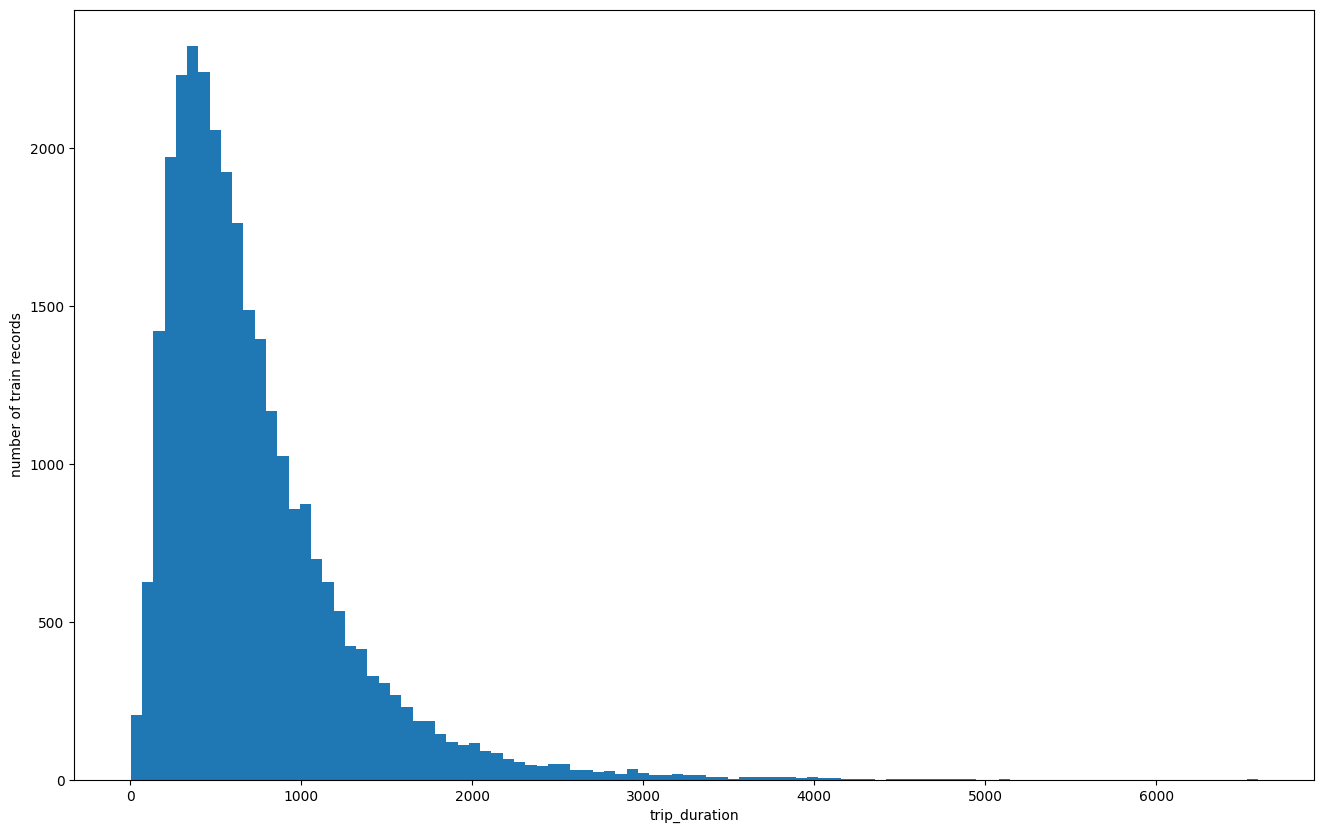

In [117]:
plt.hist(data_train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

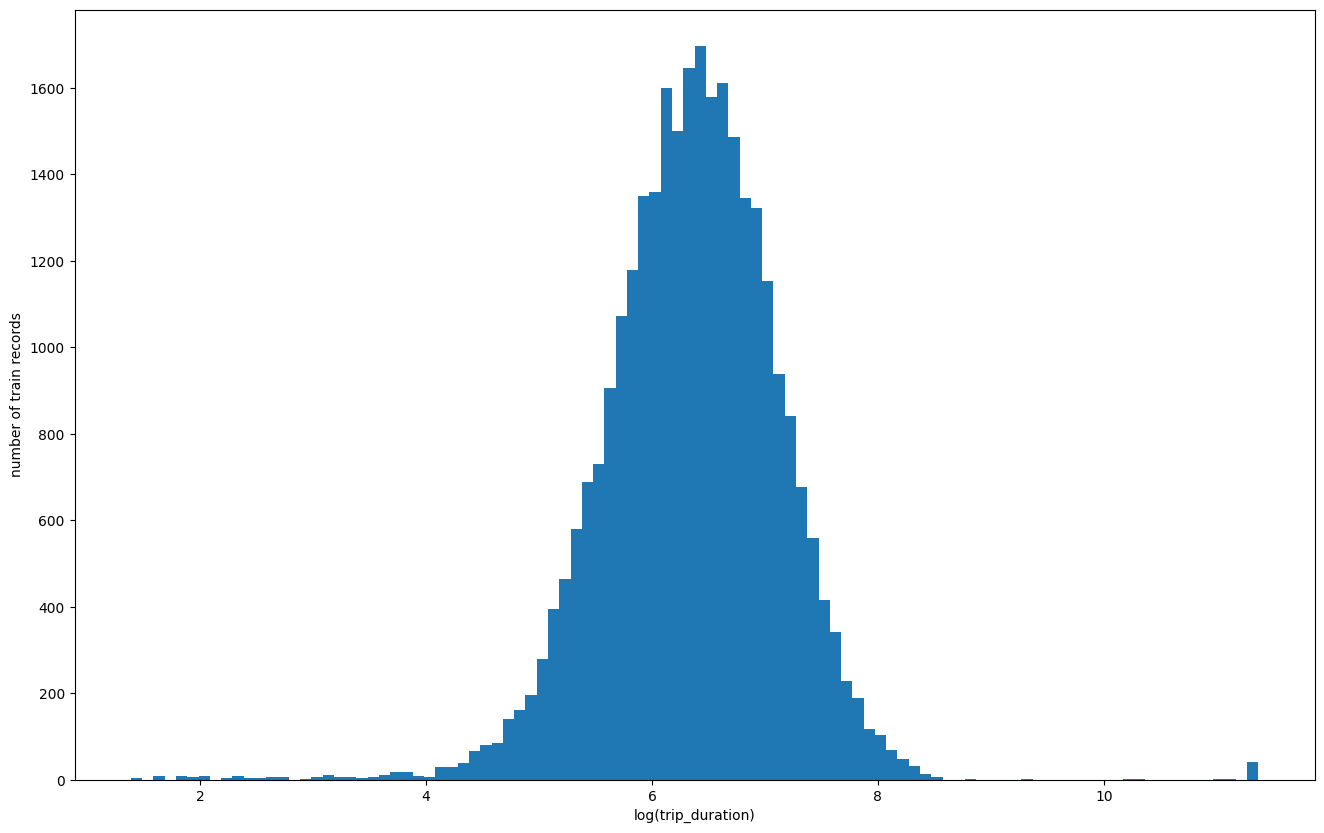

<Axes: xlabel='log_trip_duration', ylabel='Density'>

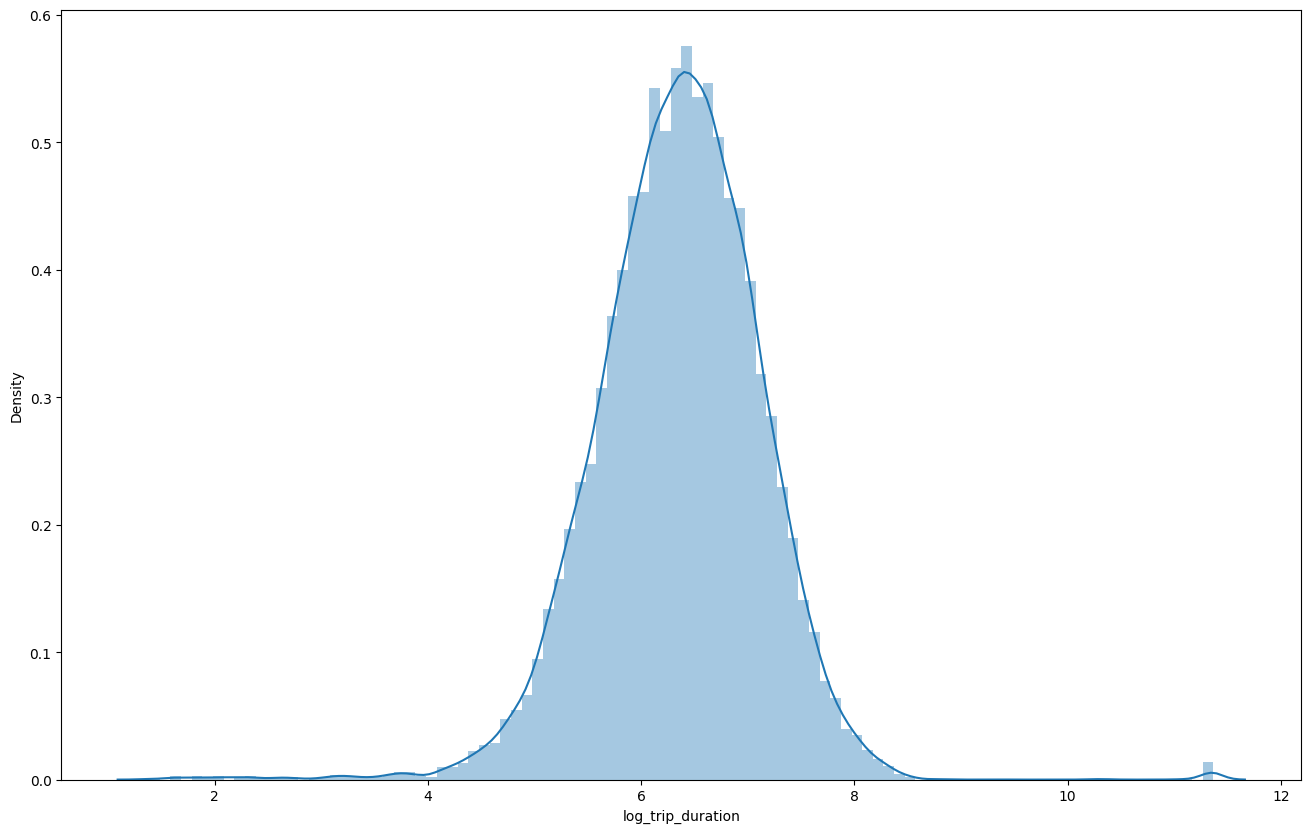

In [121]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
sns.distplot(train["log_trip_duration"], bins =100)

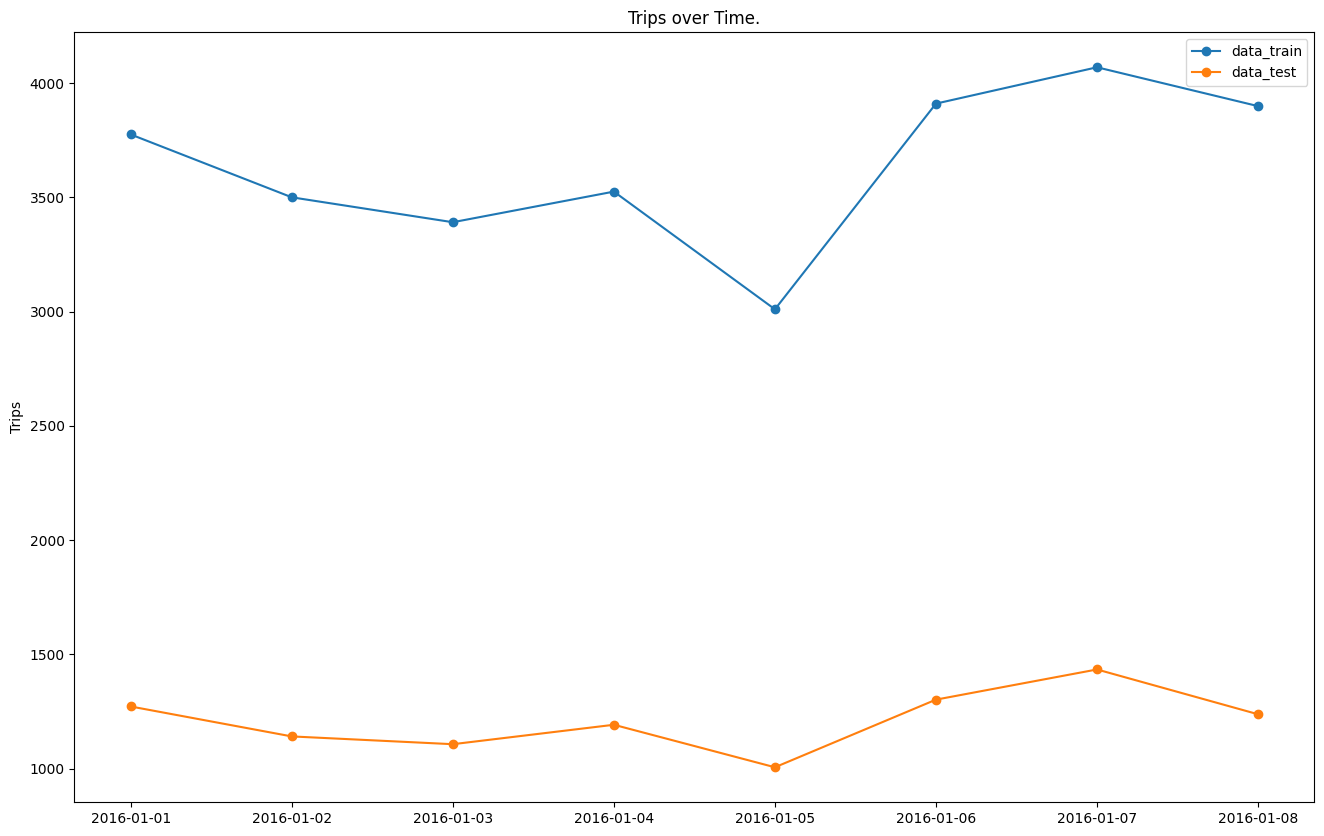

In [123]:
plt.plot(data_train.groupby('pickup_date').count()[['id']], 'o-', label='data_train')
plt.plot(data_test.groupby('pickup_date').count()[['id']], 'o-', label='data_test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

Text(0, 0.5, 'Time in Seconds')

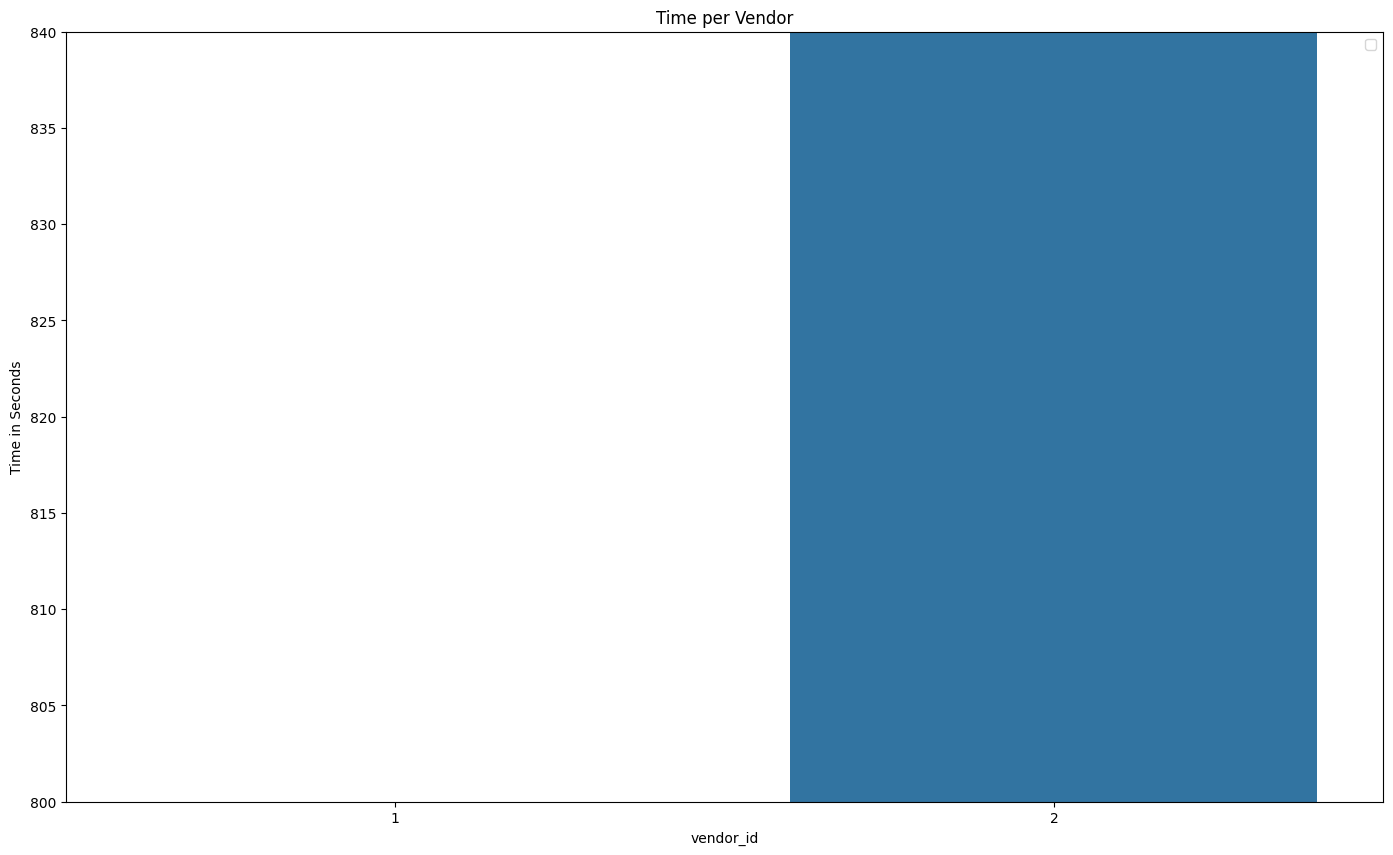

In [126]:
import warnings
warnings.filterwarnings("ignore")
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=840)
sns.barplot(x=plot_vendor.index,y=plot_vendor.values)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')

<Axes: title={'center': 'Time per store_and_fwd_flag'}, xlabel='store_and_fwd_flag', ylabel='Time in Seconds'>

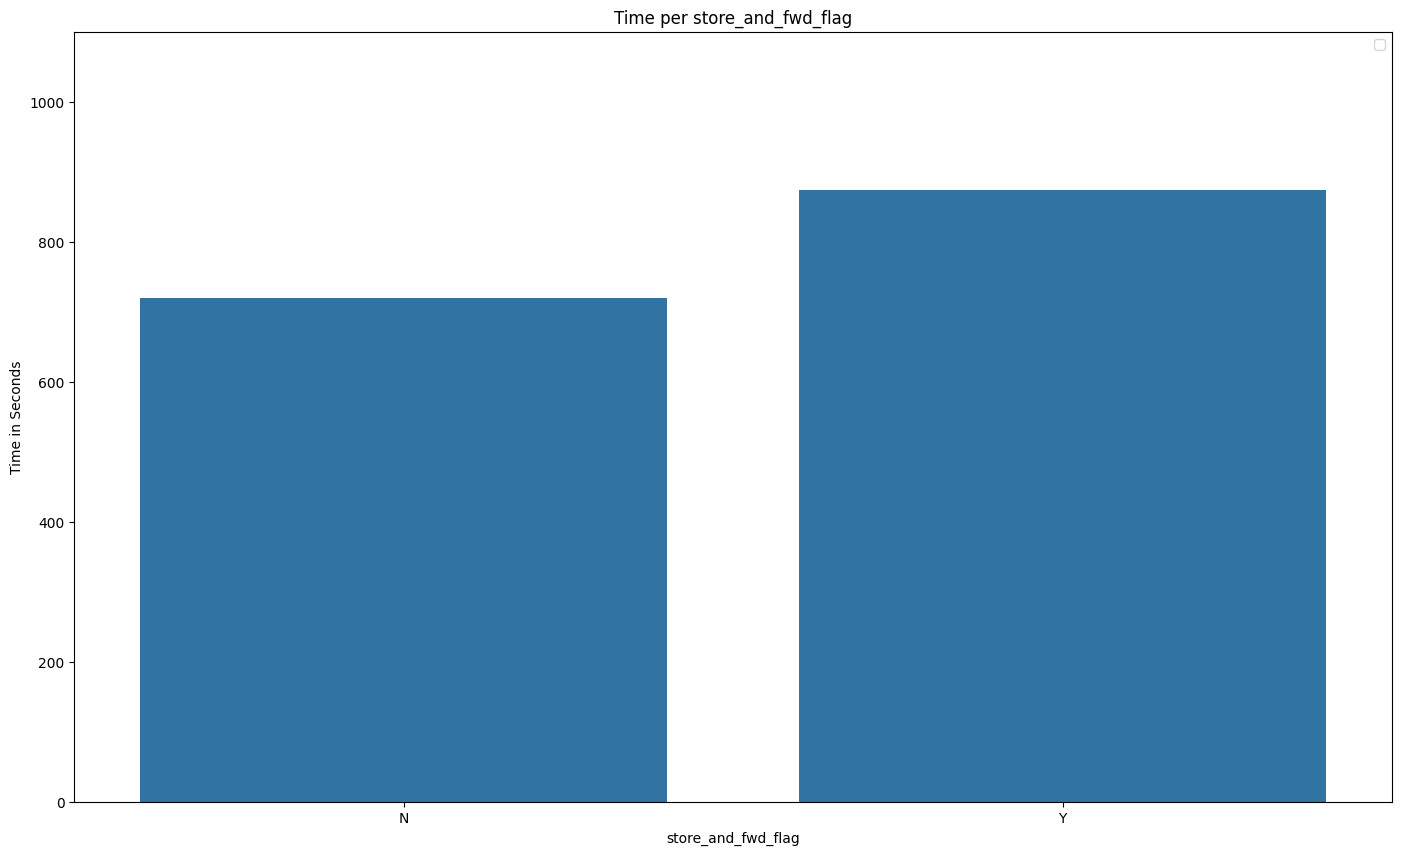

In [127]:
snwflag = data_train.groupby('store_and_fwd_flag')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(x=snwflag.index,y=snwflag.values)

<Axes: title={'center': 'Time per store_and_fwd_flag'}, xlabel='passenger_count', ylabel='Time in Seconds'>

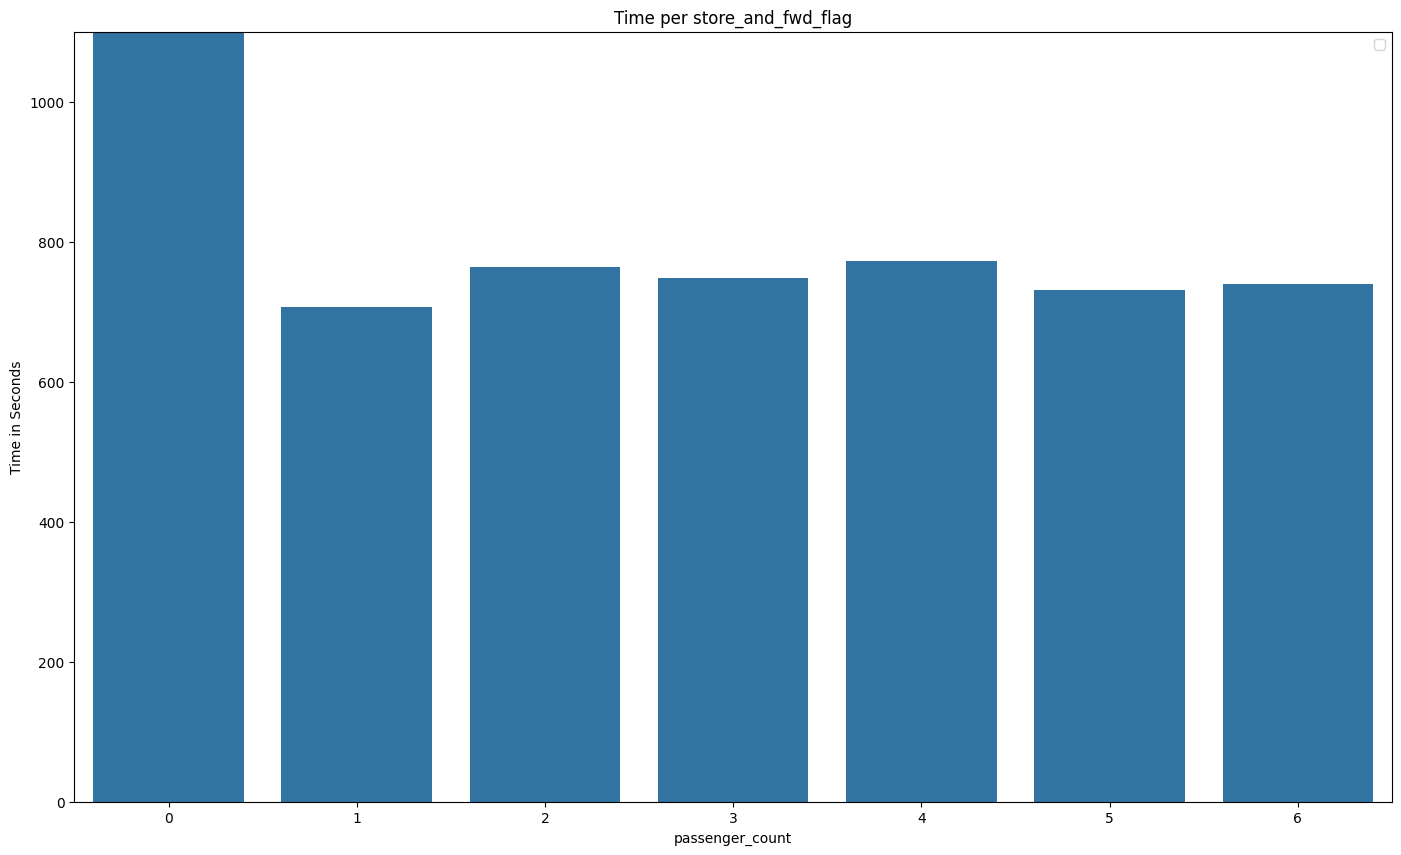

In [128]:
pc = data_train.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(x=pc.index,y=pc.values)

In [129]:
data_train.groupby('passenger_count').size()

passenger_count
0        3
1    20329
2     4261
3     1226
4      688
5     1638
6      934
dtype: int64

In [130]:
test.groupby('passenger_count').size()

passenger_count
0       2
1    6868
2    1458
3     398
4     225
5     531
6     367
dtype: int64

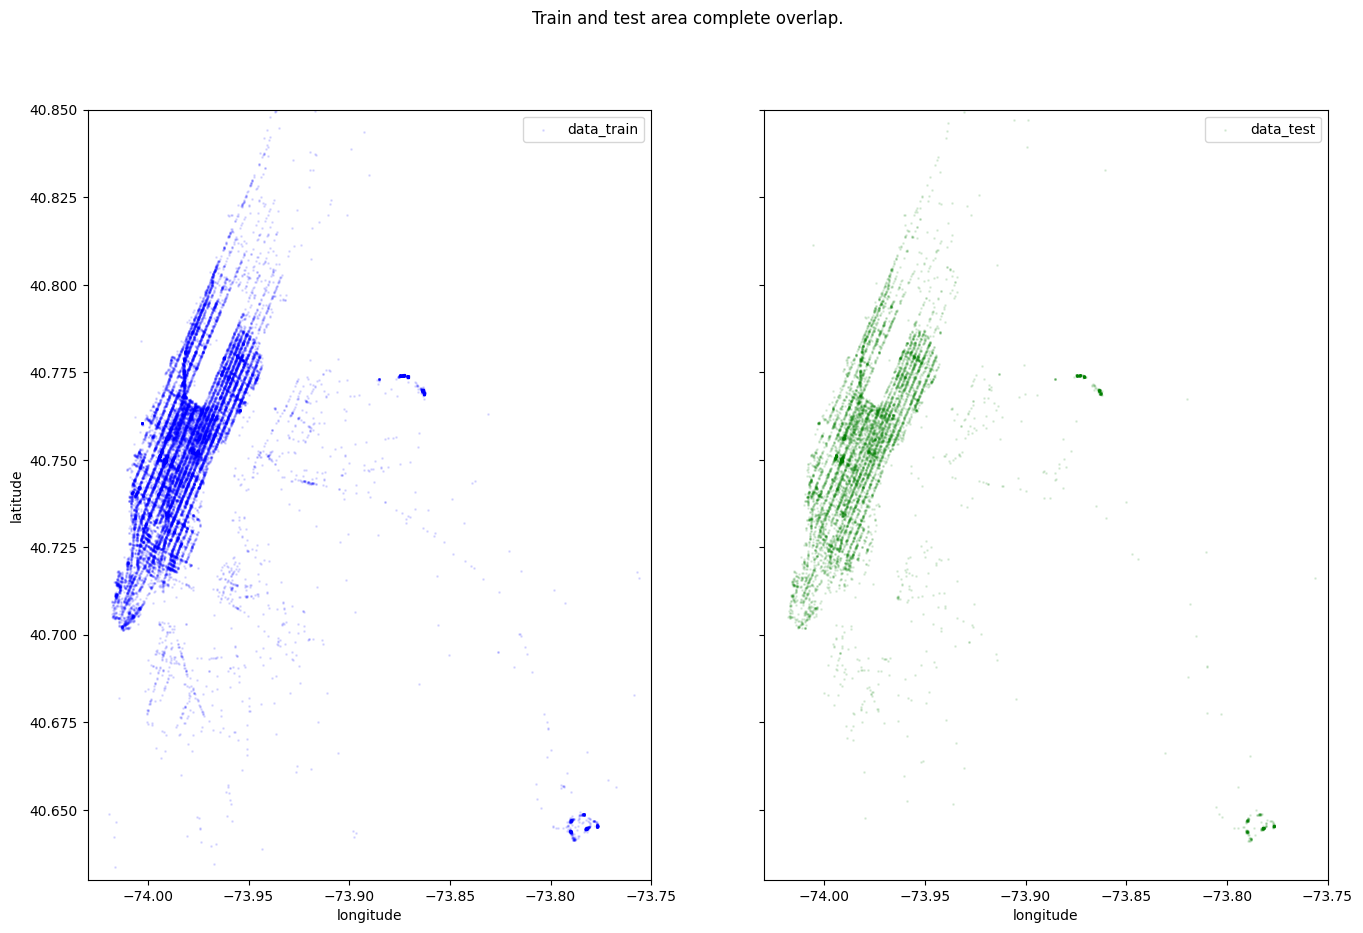

In [131]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(data_train['pickup_longitude'].values[:100000], data_train['pickup_latitude'].values[:100000],
              color='blue', s=1, label='data_train', alpha=0.1)
ax[1].scatter(data_test['pickup_longitude'].values[:100000], data_test['pickup_latitude'].values[:100000],
              color='green', s=1, label='data_test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [132]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [133]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

In [134]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

In [135]:
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [136]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

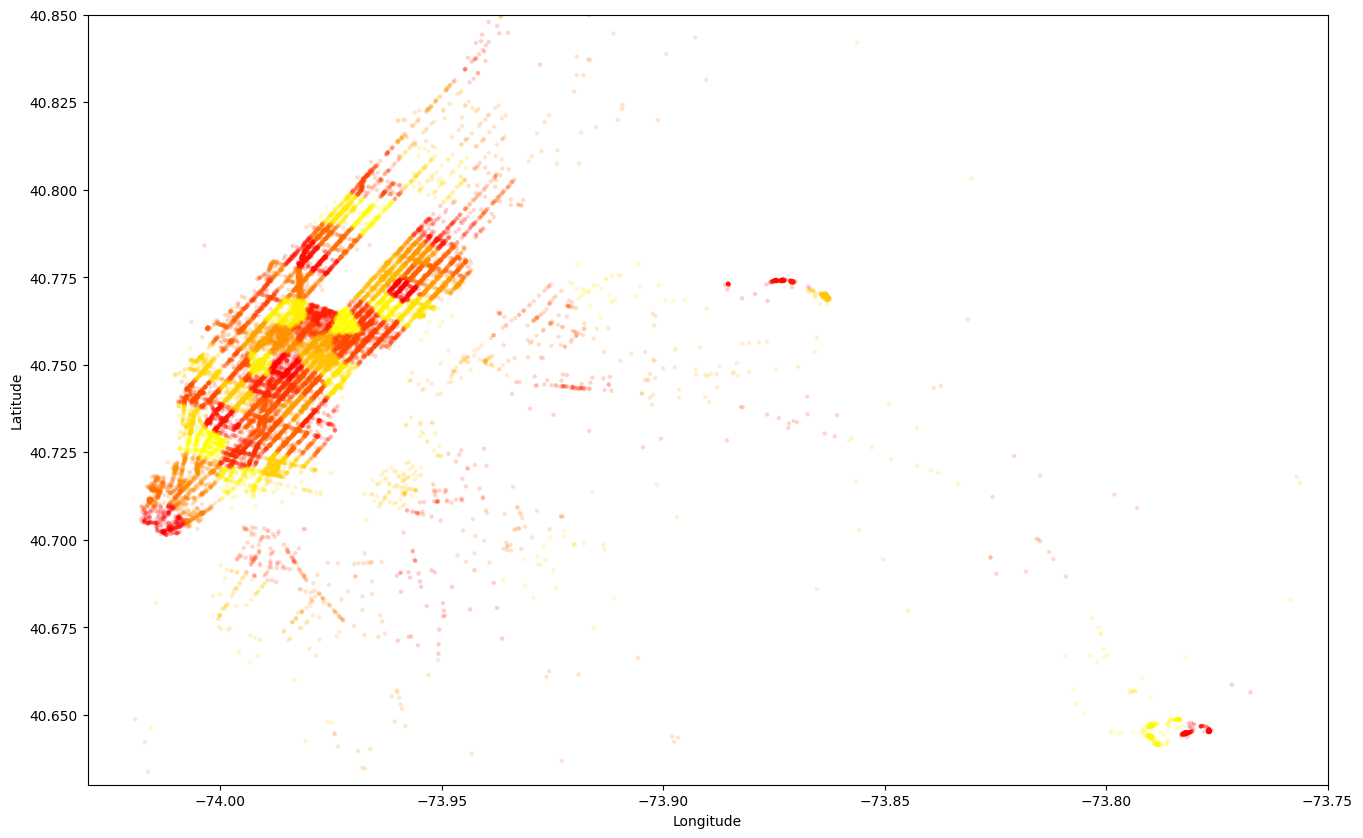

In [137]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [138]:
#Extracting Month
data_train['Month'] = data_train['pickup_datetime'].dt.month
data_test['Month'] = data_test['pickup_datetime'].dt.month

In [139]:
data_train.groupby('Month').size(),data_test.groupby('Month').size()

(Month
 1    29079
 dtype: int64,
 Month
 1    9692
 dtype: int64)

In [140]:
data_train['DayofMonth'] = data_train['pickup_datetime'].dt.day
data_test['DayofMonth'] = data_test['pickup_datetime'].dt.day


In [141]:
len(data_train.groupby('DayofMonth').size()),len(data_test.groupby('DayofMonth').size())

(8, 8)

In [142]:
data_train['Hour'] = data_train['pickup_datetime'].dt.hour
data_test['Hour'] = data_test['pickup_datetime'].dt.hour
len(data_train.groupby('Hour').size()),len(data_test.groupby('Hour').size())

(24, 24)

In [143]:
data_train['dayofweek'] = data_train['pickup_datetime'].dt.dayofweek
data_test['dayofweek'] = data_test['pickup_datetime'].dt.dayofweek
len(data_train.groupby('dayofweek').size()),len(data_test.groupby('dayofweek').size())

(7, 7)

In [144]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / data_train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / data_train['trip_duration']


KeyError: 'avg_speed_h'

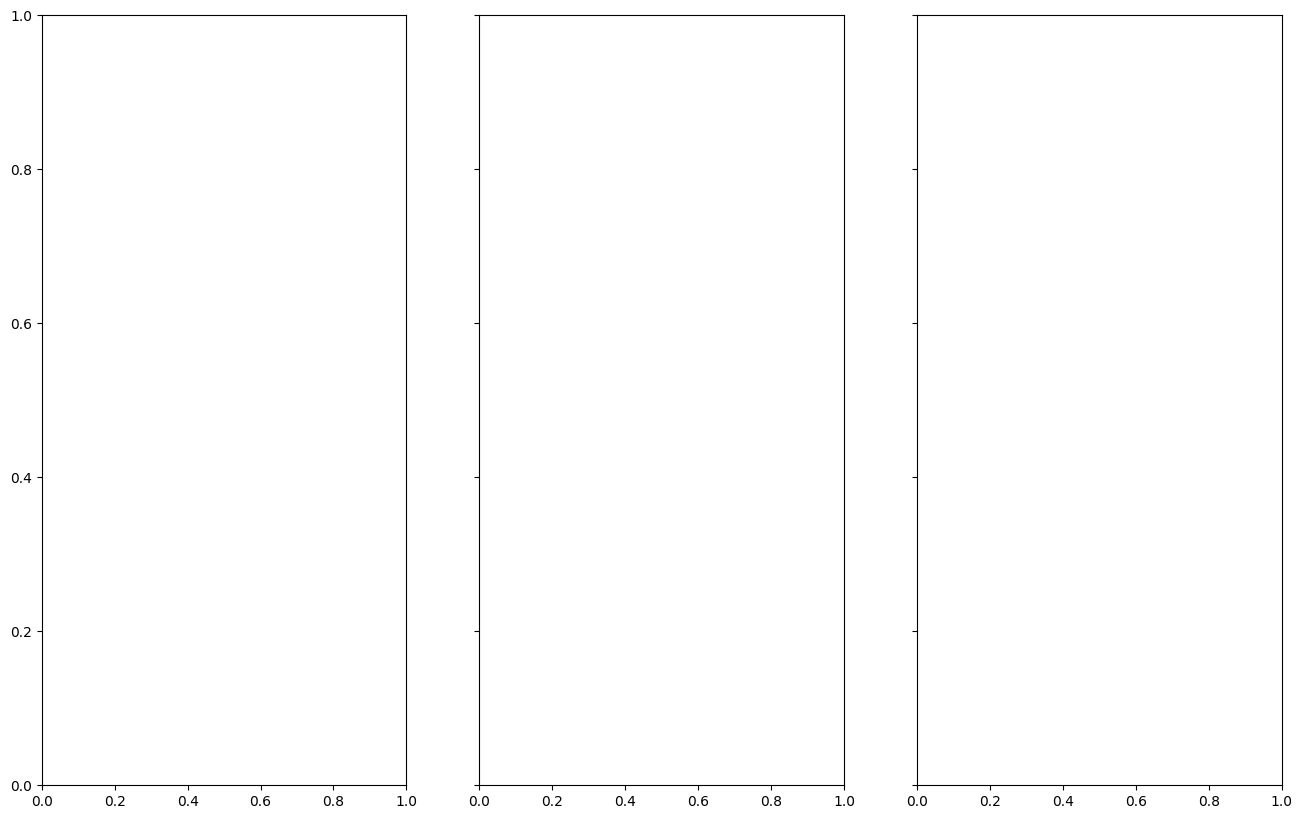

In [145]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(data_train.groupby('Hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(data_train.groupby('dayofweek').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(data_train.groupby('Month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

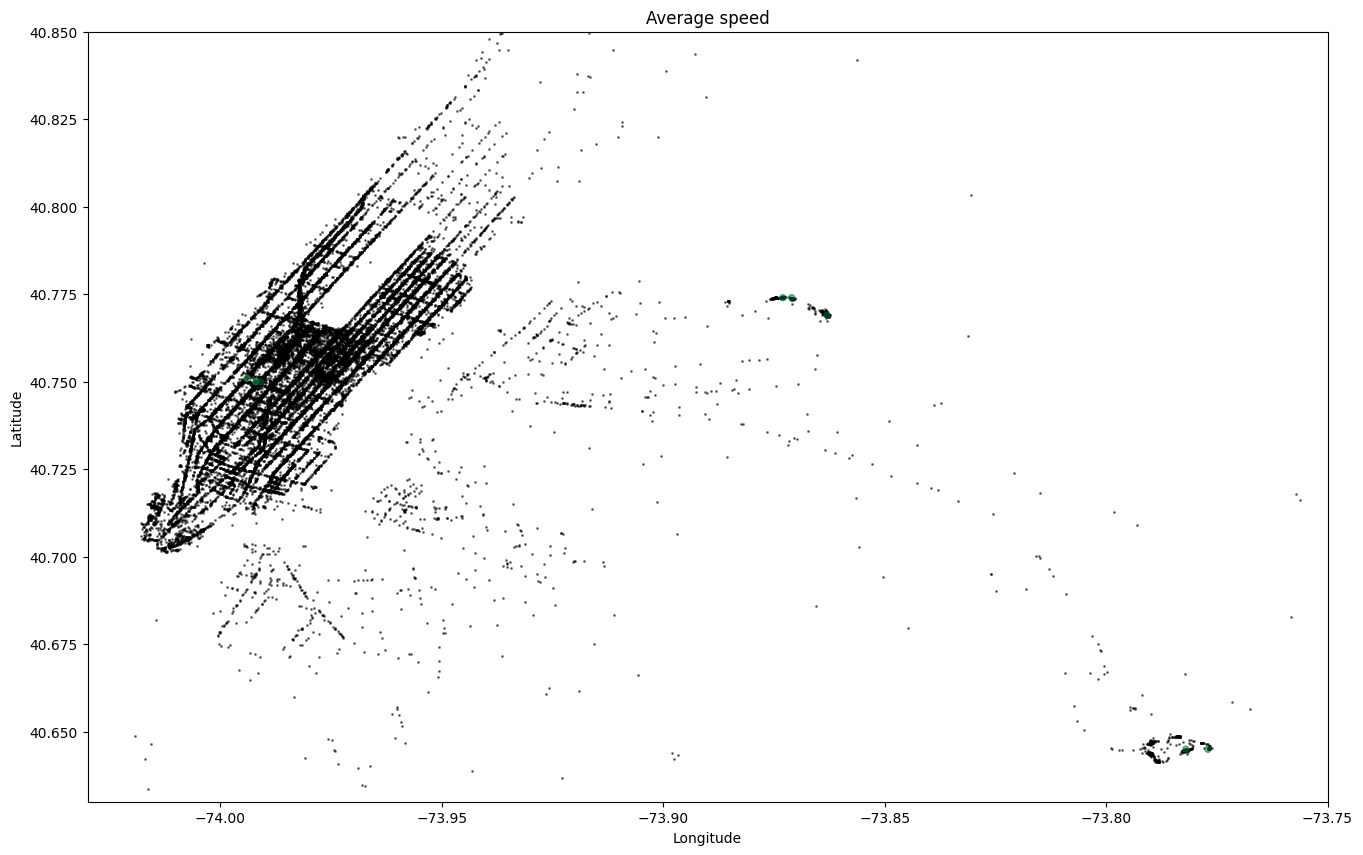

In [146]:
train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 3)
# Average speed for regions
gby_cols = ['pickup_lat_bin', 'pickup_long_bin']
coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = train.groupby(gby_cols).count()[['id']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
coord_stats = coord_stats[coord_stats['id'] > 100]
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.pickup_long_bin.values, coord_stats.pickup_lat_bin.values, c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

In [147]:
import pandas as pd

In [148]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
passenger_count_train = pd.get_dummies(train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix='d', prefix_sep='_')

month_train = pd.get_dummies(data_train['Month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(data_test['Month'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(data_train['DayofMonth'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(data_test['DayofMonth'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(data_train['Hour'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(data_test['Hour'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(data_train['dayofweek'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(data_test['dayofweek'], prefix='dow', prefix_sep='_')

In [149]:
vendor_train.shape,vendor_test.shape

((29547, 2), (9849, 2))

In [150]:
passenger_count_train.shape,passenger_count_test.shape

((29547, 8), (9849, 7))

In [151]:
store_and_fwd_flag_train.shape,store_and_fwd_flag_test.shape

((29547, 2), (9849, 2))

In [152]:
cluster_pickup_train.shape,cluster_pickup_test.shape

((29547, 100), (9849, 97))

In [153]:
cluster_dropoff_train.shape,cluster_dropoff_test.shape

((29547, 100), (9849, 100))

In [154]:
month_train.shape,month_test.shape

((29079, 1), (9692, 1))

In [155]:
dom_train.shape,dom_test.shape

((29079, 8), (9692, 8))

In [156]:
hour_train.shape,hour_test.shape

((29079, 24), (9692, 24))

In [157]:
dow_train.shape,dow_test.shape

((29079, 7), (9692, 7))

In [158]:
Train_Master = pd.concat([train,
                          vendor_train,
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train,
                          cluster_dropoff_train,
                         month_train,
                         dom_train,
                          hour_test,
                          dow_train
                         ], axis=1)

In [159]:
Test_master = pd.concat([test,
                         vendor_test,
                         passenger_count_test,
                         store_and_fwd_flag_test,
                         cluster_pickup_test,
                         cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test], axis=1)

In [160]:
Train_Master.shape,Test_master.shape

((36870, 276), (17124, 267))

In [201]:
Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [202]:
import pandas as pd
X_train = Train.drop('log_trip_duration', axis=1)
Y_train = Train["log_trip_duration"]
X_test = Test.drop('log_trip_duration', axis=1)
Y_test = Test["log_trip_duration"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [203]:
import pandas as pd
X_train = Train.drop('pickup_datetime', axis=1)
Y_train = Train["pickup_datetime"]
X_test = Test.drop('pickup_datetime', axis=1)
Y_test = Test["pickup_datetime"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [204]:
import pandas as pd
X_train = Train.drop('dropoff_datetime', axis=1)
Y_train = Train["dropoff_datetime"]
X_test = Test.drop('dropoff_datetime', axis=1)
Y_test = Test["dropoff_datetime"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [205]:
import pandas as pd
X_train = Train.drop('store_and_fwd_flag', axis=1)
Y_train = Train["store_and_fwd_flag"]
X_test = Test.drop('store_and_fwd_flag', axis=1)
Y_test = Test["store_and_fwd_flag"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [206]:
df = pd.DataFrame(data_train)
df['id'] = df['id'].astype('str')

In [207]:
df = pd.DataFrame(data_test)
df['id'] = df['id'].astype('str')

In [209]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29079 entries, 0 to 29546
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  29079 non-null  object        
 1   vendor_id           29079 non-null  int64         
 2   pickup_datetime     29079 non-null  datetime64[ns]
 3   dropoff_datetime    21797 non-null  datetime64[ns]
 4   passenger_count     29079 non-null  int64         
 5   pickup_longitude    29079 non-null  float64       
 6   pickup_latitude     29079 non-null  float64       
 7   dropoff_longitude   29079 non-null  float64       
 8   dropoff_latitude    29079 non-null  float64       
 9   store_and_fwd_flag  29079 non-null  object        
 10  gc_distance         29079 non-null  float64       
 11  trip_duration       29079 non-null  int64         
 12  google_distance     28660 non-null  float64       
 13  google_duration     28660 non-null  float64   

In [210]:
import pandas as pd
X_train = Train.drop('store_and_fwd_flag', axis=1)
Y_train = Train["store_and_fwd_flag"]
X_test = Test.drop('store_and_fwd_flag', axis=1)
Y_test = Test["store_and_fwd_flag"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [211]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29079 entries, 0 to 29546
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  29079 non-null  object        
 1   vendor_id           29079 non-null  int64         
 2   pickup_datetime     29079 non-null  datetime64[ns]
 3   dropoff_datetime    21797 non-null  datetime64[ns]
 4   passenger_count     29079 non-null  int64         
 5   pickup_longitude    29079 non-null  float64       
 6   pickup_latitude     29079 non-null  float64       
 7   dropoff_longitude   29079 non-null  float64       
 8   dropoff_latitude    29079 non-null  float64       
 9   store_and_fwd_flag  29079 non-null  object        
 10  gc_distance         29079 non-null  float64       
 11  trip_duration       29079 non-null  int64         
 12  google_distance     28660 non-null  float64       
 13  google_duration     28660 non-null  float64   